In [41]:
import OMPython
from OMPython import OMCSessionZMQ
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
help(OMPython)

Help on package OMPython:

NAME
    OMPython

DESCRIPTION
    OMPython is a Python interface to OpenModelica.
    To get started, create an OMCSession/OMCSessionZMQ object:
    from OMPython import OMCSession/OMCSessionZMQ
    omc = OMCSession()/OMCSessionZMQ()
    omc.sendExpression(command)
    
    Note: Conversion from OMPython 1.0 to OMPython 2.0 is very simple
    1.0:
    import OMPython
    OMPython.execute(command)
    2.0:
    from OMPython import OMCSession
    OMPython = OMCSession()
    OMPython.execute(command)
    
    OMPython 3.0 includes a new class OMCSessionZMQ uses PyZMQ to communicate
    with OpenModelica. A new argument `useCorba=False` is added to ModelicaSystem
    class which means it will use OMCSessionZMQ by default. If you want to use
    OMCSession then create ModelicaSystem object like this,
    obj = ModelicaSystem(useCorba=True)
    
    The difference between execute and sendExpression is the type of the
    returned expression. sendExpression maps Mo

In [5]:
omc = OMCSessionZMQ()

2018-09-02 12:00:30,860 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.vf.port.e229a9aaff594a71be1c6007f75da722 pid=2765


In [6]:
omc.sendExpression("cd()")

'/home/vf/om/models/exp/helloworld-jupyter'

In [12]:
omc.sendExpression('loadFile("test.mo")')

True

In [13]:
omc.sendExpression('cd("tmp")')

'/home/vf/om/models/exp/helloworld-jupyter/tmp'

In [32]:
sim = omc.sendExpression('simulate(A, outputFormat="csv")')

In [33]:
sim

{'messages': 'stdout            | info    | The initialization finished successfully without homotopy method.\nstdout            | info    | The simulation finished successfully.\n',
 'resultFile': '/home/vf/om/models/exp/helloworld-jupyter/tmp/A_res.csv',
 'simulationOptions': "startTime = 0.0, stopTime = 1.0, numberOfIntervals = 500, tolerance = 1e-06, method = 'dassl', fileNamePrefix = 'A', options = '', outputFormat = 'csv', variableFilter = '.*', cflags = '', simflags = ''",
 'timeBackend': 0.017502611,
 'timeCompile': 9.414512359,
 'timeFrontend': 0.043579037,
 'timeSimCode': 0.024748732,
 'timeSimulation': 0.03860621,
 'timeTemplates': 0.015123817,
 'timeTotal': 9.554401464}

In [36]:
!mv {sim['resultFile']} .

In [37]:
ls

A_res.csv  hello_world.ipynb  py_hello_world.ipynb  test.mo  tmp/


In [39]:
res = pd.read_csv('A_res.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fddecbac748>,
      dtype=object)

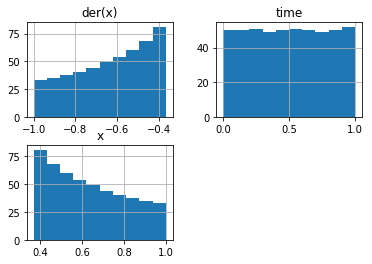

In [42]:
res.hist()

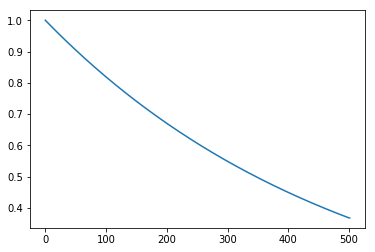

In [43]:
res['x'].plot()

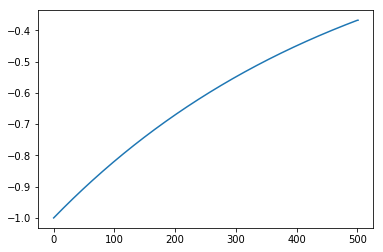

In [44]:
res['der(x)'].plot()